### This script is to analyze the energy consumption of Guideline36 control sequences for a multi-zone VAV system as well as its energy savings against different baseline control sequences.  The baseline controls use the same building and HVAC models as the Guideline 36 controls.
### A sensitivity analysis of the energy consumption of the control sequences and the Guideline36 energy savings are conducted for various parameters: different climates, internal loads, building operation hours, HVAC system efficiencies...

In [1]:
import os
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 16

In [2]:
# energy.drop_duplicates()
energy = pd.read_csv('energy.csv',index_col=0)
energy.sort_values('ETot',ascending=False,inplace=True)
#energy.to_csv('energy.csv')
energy.replace('BICBase','Base',inplace=True)
energy.replace('BICMid','Mid',inplace=True)
energy.replace('Guideline36','G36',inplace=True)
energy.round(1)
#energy.index = energy.iloc[0,:]

,EHea,ECoo,EFan,ETot,Control,Climate,Load,Hours
BICBase_SAC_lLoad_hHours,7.3,18.0,6.3,31.6,Base,SAC,lLoad,hHours
BICBase_LA_lLoad_hHours,4.7,20.9,5.9,31.5,Base,LA,lLoad,hHours
BICBase_SAC_mLoad_hHours,5.9,18.3,6.3,30.5,Base,SAC,mLoad,hHours
BICBase_LA_mLoad_hHours,3.3,21.3,5.9,30.5,Base,LA,mLoad,hHours
BICBase_LA_hLoad_hHours,1.8,22.0,6.0,29.8,Base,LA,hLoad,hHours
...,...,...,...,...,...,...,...,...
BICMid_SF_mLoad_lHours,0.3,3.4,2.0,5.7,Mid,SF,mLoad,lHours
Guideline36_SF_lLoad_mHours,0.6,3.7,1.3,5.6,G36,SF,lLoad,mHours
BICMid_SF_lLoad_lHours,0.5,3.1,1.7,5.3,Mid,SF,lLoad,lHours
Guideline36_SF_mLoad_lHours,0.2,3.5,1.4,5.1,G36,SF,mLoad,lHours


In [ ]:
#fig, ax = plt.subplots(figsize=(24,4))
#energy['ETot'].plot(kind='bar')
#ax.set_ylabel('Total HVAC Energy [kWh/m2]');

In [ ]:
df = energy[['ETot','Control']]
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.4, light=.7)
row_order = ['G36','Mid','A2B2C1','A2B1C2','A2B1C1','A1B2C2','A1B2C1','A1B1C2','Base']
#['Base', 'A1B1C2','A1B2C1','A1B2C2','A2B1C1','A2B1C2','A2B2C1', 'Mid', 'G36']
g = sns.FacetGrid(df, row="Control", hue="Control", aspect=15, height=.5, palette=pal, 
                  row_order=row_order,hue_order=row_order, xlim=[2,32.5])

# Draw the densities in a few steps
plt.figure(figsize=(16,6))
g.map(sns.kdeplot, "ETot", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "ETot", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', ha="left", va="center", transform=ax.transAxes)


g = (g.map(label, "ETot").set_axis_labels('Total HVAC site energy ($kWh/m^2$)'))

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig('energy_density_plot.png',bbox_inches='tight');

### Energy savings of Guideline 36 control sequences
#### Nine cases: Base, A1B1C2, A1B2C1, A1B2C2, A2B1C1, A2B1C2, A2B2C1, Mid, Guideline36

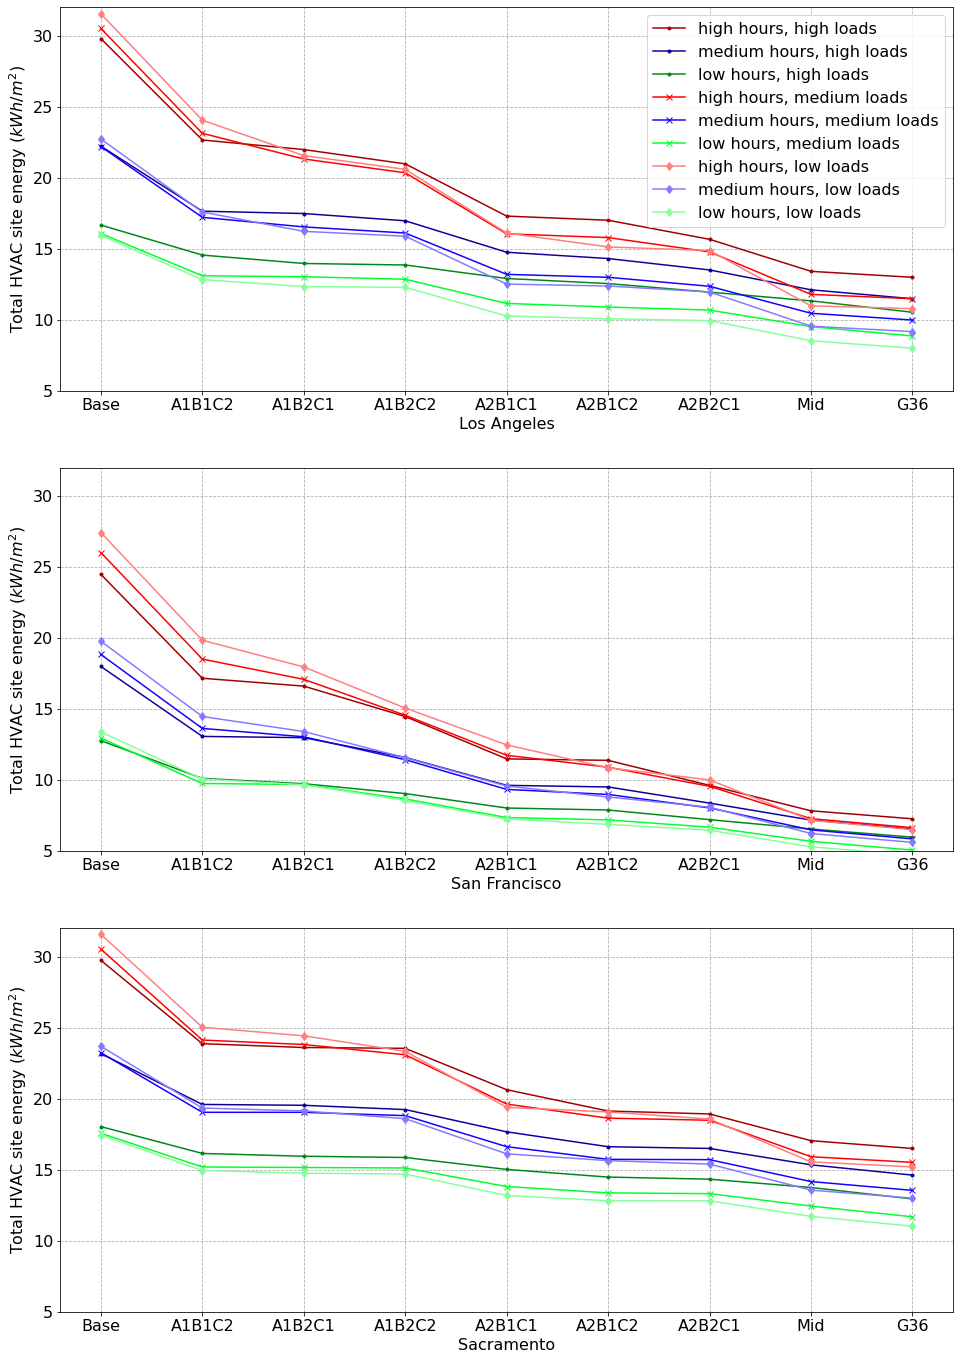

In [3]:
fig = plt.figure(figsize=(16,8*3))
kind = 'line'
labels = ['Base', 'A1B1C2','A1B2C1','A1B2C2','A2B1C1','A2B1C2','A2B2C1', 'Mid', 'G36']
x = np.arange(len(labels))
ax1 = fig.add_subplot(3,1,1)
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Climate']=='LA')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')
ax2 = fig.add_subplot(3,1,2)
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Climate']=='SF')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')
ax3 = fig.add_subplot(3,1,3)
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Climate']=='SAC')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')

for ax in [ax1,ax2,ax3]:
    ax.set_ylabel('Total HVAC site energy ($kWh/m^2$)')
    ax.set_xticks(x)
    ax.set_ylim([5,32])
    ax.set_xticklabels('')
    ax.grid(linestyle='--')
    ax.set_xticklabels(labels)
ax1.legend(['high hours, high loads','medium hours, high loads','low hours, high loads',
           'high hours, medium loads','medium hours, medium loads','low hours, medium loads',
           'high hours, low loads','medium hours, low loads','low hours, low loads'])
ax1.set_xlabel('Los Angeles')
ax2.set_xlabel('San Francisco')
ax3.set_xlabel('Sacramento')
plt.savefig('controls_hours_loads.png',bbox_inches='tight');

### Impact of Hours of operation
#### High = 105 hours/week, Medium = 75 hours/week, Low = 50 hours/week

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
kind = 'line'
labels = ['High hours (105h/w)', 'Medium hours (75h/w)', 'Low hours (50h/w)']
x = np.arange(len(labels))
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Load']=='hLoad')]['ETot'].plot(kind=kind,color='blue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Load']=='mLoad')]['ETot'].plot(kind=kind,color='cornflowerblue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Load']=='lLoad')]['ETot'].plot(kind=kind,color='dodgerblue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Load']=='hLoad')]['ETot'].plot(kind=kind,color='red')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Load']=='mLoad')]['ETot'].plot(kind=kind,color='brown')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Load']=='lLoad')]['ETot'].plot(kind=kind,color='lightcoral')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Load']=='hLoad')]['ETot'].plot(kind=kind,color='green')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Load']=='mLoad')]['ETot'].plot(kind=kind,color='springgreen')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Load']=='lLoad')]['ETot'].plot(kind=kind,color='palegreen')
ax.set_ylabel('Total HVAC Energy [kWh/m2]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid(linestyle='--');

### Impact of internal loads
#### High load = 100%; Medium load = 60%; Low load = 30%

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
kind = 'line'
labels = ['High load (100%)', 'Medium load (60%)', 'Low load (30%)']
x = np.arange(len(labels))
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='blue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='cornflowerblue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Base')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='dodgerblue')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='red')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='brown')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='Mid')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='lightcoral')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='green')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='springgreen')
energy.loc[(energy['Climate']=='LA')&(energy['Control']=='G36')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='palegreen')
ax.set_ylabel('Total HVAC Energy [kWh/m2]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.grid(linestyle='--');

### Impact of Climates
#### Three climates: Sacramento, Los Angeles, San Francisco

In [ ]:
fig = plt.figure(figsize=(16,21))
ax1 = fig.add_subplot(3,1,1)
kind = 'line'
labels = ['Sacramento', 'Los Angeles', 'San Francisco']
x = np.arange(len(labels))
energy.loc[(energy['Control']=='Base')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Control']=='Base')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')
ax2 = fig.add_subplot(3,1,2)
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Control']=='Mid')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')
ax3 = fig.add_subplot(3,1,3)
energy.loc[(energy['Control']=='G36')&(energy['Load']=='hLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#a10000',marker='.')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='hLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#0d0098',marker='.')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='hLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#008717',marker='.')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='mLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff0000',marker='x')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='mLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#1500ff',marker='x')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='mLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#00ff2b',marker='x')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='lLoad')&(energy['Hours']=='hHours')]['ETot'].plot(kind=kind,color='#ff7e7e',marker='d')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='lLoad')&(energy['Hours']=='mHours')]['ETot'].plot(kind=kind,color='#857aff',marker='d')
energy.loc[(energy['Control']=='G36')&(energy['Load']=='lLoad')&(energy['Hours']=='lHours')]['ETot'].plot(kind=kind,color='#85ff99',marker='d')
for ax in [ax1,ax2,ax3]:
    ax.set_ylabel('Total HVAC site energy ($kWh/m^2$)')
    ax.set_xticks(x)
    ax.set_xticklabels('')
    ax.set_ylim([3,33])
    ax.grid(linestyle='--')
ax2.legend(['high hours, high loads','medium hours, high loads','low hours, high loads',
            'high hours, medium loads','medium hours, medium loads','low hours, medium loads',
            'high hours, low loads','medium hours, low loads','low hours, low loads'],
            loc='upper right')
ax1.set_xlabel('Base control scenario')
ax2.set_xlabel('Mid control scenario')
ax3.set_xlabel('G36 control scenario')
ax.set_xticklabels(labels)
plt.savefig('climate.png',bbox_inches='tight');

### Impact of HVAC system efficiency
#### High (COPh=4.0, COPc=3.2), Low (COPh=2.0, COPc=1.6)

In [ ]:
COPh = 2.0
COPc = 1.6

simulations = os.path.abspath(os.path.join("","..","simulations"))
result_folders = [x[0] for x in os.walk(simulations)]
hea = []
coo = []
fan = []
tot = []
case = []
ctrl = []
cli = []
loa = []
hou = []
for folder in result_folders:
    # glob returns a list of path
    result_file_path = glob.glob(os.path.join(folder,'*.csv'))
    for path in result_file_path:
        case_name = path.split('/')[-2]
        control = case_name.split('_')[0]
        climate = case_name.split('_')[1]
        load = case_name.split('_')[2]
        hours = case_name.split('_')[3]
        df = pd.read_csv(path)
        j_to_kwh = 1/1000/3600
        EHea = df['res.EHea'].iloc[-1]*j_to_kwh/COPh
        ECoo = -1*(df['res.ECooSen'].iloc[-1]+df['res.ECooLat'].iloc[-1])*j_to_kwh/COPc
        EFan = df['res.EFan'].iloc[-1]*j_to_kwh
        ETot = EHea+ECoo+EFan
        case.append(case_name)
        ctrl.append(control)
        cli.append(climate)
        loa.append(load)
        hou.append(hours)
        hea.append(EHea)
        coo.append(ECoo)
        fan.append(EFan)
        tot.append(ETot)
    energy_low = pd.DataFrame({'EHea':hea,'ECoo':coo,'EFan':fan,'ETot':tot,'Control':ctrl,'Climate':cli, \
                           'Load':loa,'Hours':hou},index=case)
energy_low.sort_values('ETot',ascending=False,inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
kind = 'line'
labels = energy.index
x = np.arange(len(labels))
energy['ETot'].plot(kind=kind,label='High HVAC efficiency')
energy_low['ETot'].plot(kind=kind, label='Low HVAC efficiency')
ax.set_ylabel('Total HVAC Energy [kWh/m2]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.grid(linestyle='--')
plt.legend();

### Energy savings analysis

In [4]:
climates = ['LA', 'SF', 'SAC']
loads = ['hLoad', 'mLoad', 'lLoad']
hours = ['hHours', 'mHours', 'lHours']
sav_table = pd.DataFrame(columns=['Climate','Load','Hours','Base (%)', 'Mid (%)'])
for climate in climates:
    for load in loads:
        for hour in hours:
            compare = energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)]['ETot']
            if compare.empty:
                continue
            else:
                sav_base = round((compare[0]-compare[-1])/compare[0]*100,1)
                sav_mid = round((compare[-2]-compare[-1])/compare[-2]*100,1)
            savings = pd.DataFrame({'Climate':[climate],'Load':[load],'Hours':[hour],'Base (%)':[sav_base],'Mid (%)':[sav_mid]})
            sav_table = sav_table.append(savings,ignore_index=True)
sav_table.sort_values('Base (%)',ascending=False,inplace=True)
sav_table.to_csv('savings.csv')

In [5]:
climates = ['LA', 'SF', 'SAC']
loads = ['hLoad', 'mLoad', 'lLoad']
hours = ['hHours', 'mHours', 'lHours']
sav_table = pd.DataFrame(columns=['Climate','Load','Hours','Savings (%)'])
compare = pd.DataFrame()
for climate in climates:
    for load in loads:
        for hour in hours:
            #print(energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)]['ETot'])
            compare = energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)]['ETot']
            compare.index = energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)].index
            if compare.empty:
                continue
            else:
                for i in range(0,8):
                    sav = round((compare[i]-compare[-1])/compare[i]*100,1)
                    #print(sav)
                    #sav_mid = round((compare[-2]-compare[-1])/compare[-2]*100,1)
                    savings = pd.DataFrame({'Climate':[climate],'Load':[load],'Hours':[hour],'Savings (%)':[sav]})
                    sav_table = sav_table.append(savings,ignore_index=True)
print("The mean savings of all cases is {}".format(sav_table['Savings (%)'].mean()))
print("The median savings of all cases is {}".format(sav_table['Savings (%)'].median()))
print("The max savings of all cases is {}".format(sav_table['Savings (%)'].max()))
print("The min savings of all cases is {}".format(sav_table['Savings (%)'].min()))

The mean savings of all cases is 31.09074074074074
The median savings of all cases is 29.7
The max savings of all cases is 76.2
The min savings of all cases is 1.8


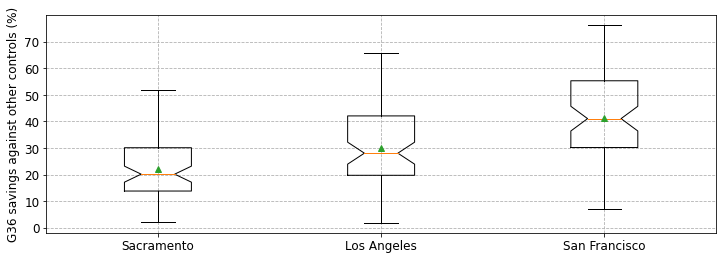

In [8]:
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(12,4)) 
ax = fig.add_subplot(111)
data = [sav_table[sav_table['Climate']=='SAC']['Savings (%)'],
        sav_table[sav_table['Climate']=='LA']['Savings (%)'],
        sav_table[sav_table['Climate']=='SF']['Savings (%)']]
ax.boxplot(data,notch=True,showmeans=True,labels=['Sacramento','Los Angeles','San Francisco'])
plt.grid(linestyle='--')
plt.ylabel('G36 savings against other controls (%)')
plt.savefig('boxplot_climate.png',bbox_inches='tight');

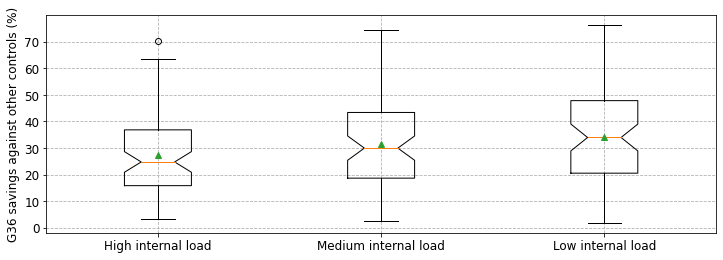

In [9]:
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(12,4)) 
ax = fig.add_subplot(111)
data = [sav_table[sav_table['Load']=='hLoad']['Savings (%)'],
        sav_table[sav_table['Load']=='mLoad']['Savings (%)'],
        sav_table[sav_table['Load']=='lLoad']['Savings (%)']]
ax.boxplot(data,notch=True,showmeans=True,labels=['High internal load','Medium internal load','Low internal load'])
plt.grid(linestyle='--')
plt.ylabel('G36 savings against other controls (%)')
plt.savefig('boxplot_load',bbox_inches='tight');

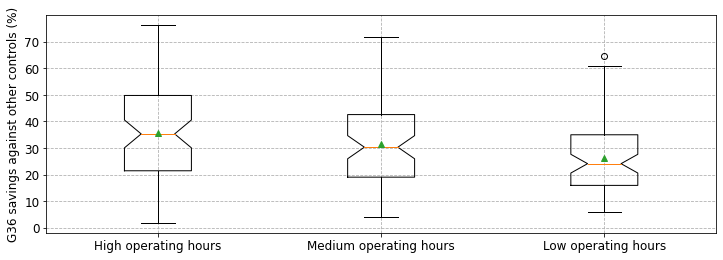

In [10]:
plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(12,4)) 
ax = fig.add_subplot(111)
data = [sav_table[sav_table['Hours']=='hHours']['Savings (%)'],
        sav_table[sav_table['Hours']=='mHours']['Savings (%)'],
        sav_table[sav_table['Hours']=='lHours']['Savings (%)']]
ax.boxplot(data,notch=True,showmeans=True,labels=['High operating hours','Medium operating hours','Low operating hours'])
plt.grid(linestyle='--')
plt.ylabel('G36 savings against other controls (%)')
plt.savefig('boxplot_hours',bbox_inches='tight');

In [ ]:
climates = ['LA', 'SF', 'SAC']
loads = ['hLoad', 'mLoad', 'lLoad']
hours = ['hHours', 'mHours', 'lHours']
sav_table_e = pd.DataFrame(columns=['Climate','Load','Hours','Savings (%)'])
compare = pd.DataFrame()
for climate in climates:
    for load in loads:
        for hour in hours:
            #print(energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)]['ETot'])
            compare = energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)]['ETot']
            compare.index = energy.loc[(energy['Climate']==climate)&(energy['Load']==load)&(energy['Hours']==hour)].index
            if compare.empty:
                continue
            else:
                for i in range(1,8):
                    sav = round((compare[i]-compare[-1])/compare[i]*100,1)
                    #print(sav)
                    #sav_mid = round((compare[-2]-compare[-1])/compare[-2]*100,1)
                    savings = pd.DataFrame({'Climate':[climate],'Load':[load],'Hours':[hour],'Savings (%)':[sav]})
                    sav_table_e = sav_table_e.append(savings,ignore_index=True)
print("The mean savings excluding Base cases is {}".format(sav_table_e['Savings (%)'].mean()))
print("The max savings excluding Base cases is {}".format(sav_table_e['Savings (%)'].max()))
print("The min savings excluding Base cases is {}".format(sav_table_e['Savings (%)'].min()))

### Analyze thermal discomfort using indoor temperatures as indicators

In [6]:
sp_violate = pd.read_csv('discomfort.csv',index_col=0)
sp_violate.replace('BICBase','Base',inplace=True)
sp_violate.replace('BICMid','Mid',inplace=True)
sp_violate.replace('Guideline36','G36',inplace=True)
sp_violate['VCoo'] = sp_violate['DCoo']/60
sp_violate['VHea'] = sp_violate['DHea']/60
sp_violate

,EHea,ECoo,EFan,ETot,Control,Climate,Load,Hours,DHea,DCoo,VCoo,VHea
A1B1C2_LA_hLoad_hHours,0.270542,17.532629,4.176614,21.979785,A1B1C2,LA,hLoad,hHours,1043.78170,306.61800,5.110300,17.396362
A1B1C2_LA_hLoad_lHours,0.034078,11.856293,2.664699,14.555070,A1B1C2,LA,hLoad,lHours,164.78284,2871.25100,47.854183,2.746381
A1B1C2_LA_hLoad_mHours,0.118386,14.237592,3.287258,17.643237,A1B1C2,LA,hLoad,mHours,451.98752,808.74710,13.479118,7.533125
A1B1C2_LA_lLoad_hHours,1.768364,15.876558,3.912162,21.557085,A1B1C2,LA,lLoad,hHours,3035.63530,124.74862,2.079144,50.593922
A1B1C2_LA_lLoad_lHours,0.249281,9.890960,2.200120,12.340362,A1B1C2,LA,lLoad,lHours,538.27950,1597.02270,26.617045,8.971325
...,...,...,...,...,...,...,...,...,...,...,...,...
Guideline36_SF_lLoad_hHours,0.849545,4.217254,1.456239,6.523038,G36,SF,lLoad,hHours,1214.20810,3101.22340,51.687057,20.236802
Guideline36_SAC_mLoad_mHours,0.929937,11.453836,1.161871,13.545645,G36,SAC,mLoad,mHours,988.81270,3776.97970,62.949662,16.480212
Guideline36_SF_hLoad_lHours,0.142949,3.925875,1.928369,5.997194,G36,SF,hLoad,lHours,242.56818,8885.20400,148.086733,4.042803
Guideline36_SAC_hLoad_mHours,0.609753,12.545279,1.462052,14.617085,G36,SAC,hLoad,mHours,668.51510,5156.77700,85.946283,11.141918


/home/kun/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/kun/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


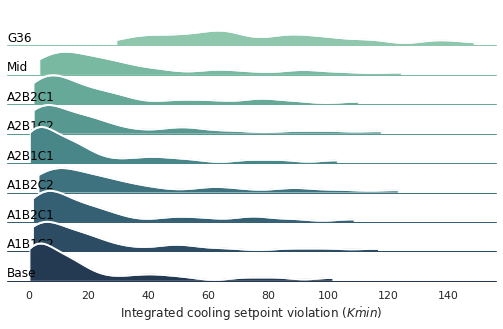

<Figure size 1152x432 with 0 Axes>

In [7]:
df = sp_violate[['VCoo','Control']]
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.4, light=.7)
row_order = ['G36','Mid','A2B2C1','A2B1C2','A2B1C1','A1B2C2','A1B2C1','A1B1C2','Base']
#['Base', 'A1B1C2','A1B2C1','A1B2C2','A2B1C1','A2B1C2','A2B2C1', 'Mid', 'G36']
g = sns.FacetGrid(df, row="Control", hue="Control", aspect=15, height=0.5, palette=pal, 
                  row_order=row_order,hue_order=row_order)

# Draw the densities in a few steps
plt.figure(figsize=(16,6))
g.map(sns.kdeplot, "VCoo", clip_on=False, shade=True, alpha=1, lw=1, bw=.2)
g.map(sns.kdeplot, "VCoo", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=1, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', ha="left", va="center", transform=ax.transAxes)


g = (g.map(label, "VCoo").set_axis_labels('Integrated cooling setpoint violation ($K \dot min$)'))

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
#plt.savefig('discomfort_density_plot.png',bbox_inches='tight');

### Process energy and discomfort data

In [21]:
COPh = 4.0
COPc = 3.2

#simulations = os.path.abspath(os.path.join("","..","simulations"))
simulations = "/mnt/hgfs/E/simulations"
result_folders = [x[0] for x in os.walk(simulations)]
hea = []
coo = []
fan = []
tot = []
case = []
ctrl = []
cli = []
loa = []
hou = []
discomfort_hea = []
discomfort_coo = []
for folder in result_folders:
    # glob returns a list of path
    result_file_path = glob.glob(os.path.join(folder,'*.txt'))
    for path in result_file_path:
        if path.split('/')[-1] == 'dslog.txt':
            pass
        else:
            # print(path)
            case_name = path.split('/')[-2]
            control = case_name.split('_')[0]
            climate = case_name.split('_')[1]
            load = case_name.split('_')[2]
            hours = case_name.split('_')[3]
            df = pd.read_csv(path)
            j_to_kwh = 1/1000/3600
            EHea = df['res.EHea'].iloc[-1]*j_to_kwh/COPh
            ECoo = -1*(df['res.ECooSen'].iloc[-1]+df['res.ECooLat'].iloc[-1])*j_to_kwh/COPc
            EFan = df['res.EFan'].iloc[-1]*j_to_kwh
            ETot = EHea+ECoo+EFan
            DHea = df['res.DiscomfortHeating'].iloc[-1]
            DCoo = df['res.DiscomfortCooling'].iloc[-1]
            case.append(case_name)
            ctrl.append(control)
            cli.append(climate)
            loa.append(load)
            hou.append(hours)
            hea.append(EHea)
            coo.append(ECoo)
            fan.append(EFan)
            tot.append(ETot)
            discomfort_hea.append(DHea)
            discomfort_coo.append(DCoo)
        energy = pd.DataFrame({'EHea':hea,'ECoo':coo,'EFan':fan,'ETot':tot,'Control':ctrl,'Climate':cli, \
                               'Load':loa,'Hours':hou,'DHea':discomfort_hea,'DCoo':discomfort_coo},index=case)
energy.to_csv('discomfort_non_g36.csv')

In [20]:
energy

,EHea,ECoo,EFan,ETot,Control,Climate,Load,Hours,DHea,DCoo
Guideline36_SF_mLoad_mHours,0.404584,3.953132,1.516247,5.873963,Guideline36,SF,mLoad,mHours,649.869800,4654.5015
Guideline36_LA_hLoad_hHours,0.016521,11.424152,1.550630,12.991303,Guideline36,LA,hLoad,hHours,22.218016,4067.4116
Guideline36_SF_lLoad_lHours,0.364786,3.183906,1.169859,4.718551,Guideline36,SF,lLoad,lHours,572.619750,6014.1750
Guideline36_LA_lLoad_lHours,0.032159,7.129710,0.838491,8.000360,Guideline36,LA,lLoad,lHours,52.610550,4154.7150
Guideline36_SF_mLoad_lHours,0.240227,3.460288,1.386824,5.087339,Guideline36,SF,mLoad,lHours,411.570920,6954.9950
Guideline36_SAC_lLoad_hHours,1.789021,12.351629,1.053991,15.194641,Guideline36,SAC,lLoad,hHours,2049.515000,2075.2017
Guideline36_SAC_lLoad_mHours,1.271745,10.716627,1.008458,12.996830,Guideline36,SAC,lLoad,mHours,1470.660300,3129.2440
Guideline36_SF_mLoad_hHours,0.542048,4.480120,1.644747,6.666915,Guideline36,SF,mLoad,hHours,802.494100,3675.8930
Guideline36_LA_mLoad_hHours,0.075618,10.238634,1.169697,11.483948,Guideline36,LA,mLoad,hHours,235.116940,2456.2092
Guideline36_LA_mLoad_lHours,0.013223,7.813188,1.036112,8.862522,Guideline36,LA,mLoad,lHours,23.949652,5545.4380


### Obsolete code for plotting and thermal discomfort

In [ ]:
energy_la = energy.loc[(energy['Climate']=='LA')]
energy_la

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'cornflowerblue', 'dodgerblue', 'red', 'brown', 'lightcoral', 'green','springgreen','palegreen']
controls = ['Base', 'A1B1C2','A1B2C1','A1B2C2','A2B1C1','A2B1C2','A2B2C1', 'Mid', 'G36']
loads = ['hLoad', 'mLoad', 'lLoad']
hours = ['hHours', 'mHours', 'lHours']
xticks = ['high','medium','low']
yticks = ['high','medium','low']

for control,color in zip(controls,colors):
    xs = range(len(energy_la.loc[(energy['Control']==control)]['Load']))
    ys = range(len(energy_la.loc[(energy['Control']==control)]['Hours']))   
    zs = energy_la.loc[(energy['Control']==control)]['ETot']
    #xs = energy_la.loc[(energy['Control']==control)&(energy['Hours']==hour)&(energy['Load']==load)]['Load']
    #print(xs)
    #ys = energy_la.loc[(energy['Control']==control)&(energy['Hours']==hour)&(energy['Load']==load)]['Hours']
    #print(ys)
    #zs = energy_la.loc[(energy['Control']==control)&(energy['Hours']==hour)&(energy['Load']==load)]['ETot']
    #print(zs)
    ax.scatter(xs, ys, zs, color=color)
ax.set(xticks=([2,4,6]),xlim=(0,8),xticklabels=xticks,
       yticks=([2,4,6]),ylim=(0,8),yticklabels=yticks,
       zlim=(0,32))

ax.set_xlabel('Internal gains')
ax.set_ylabel('Operation hours')
ax.set_zlabel('Total HVAC site energy [kWh/m2]');

In [ ]:
TSet_lHours = pd.read_csv('/home/kun/Documents/bic-savcal36/simulations/lHours_TSet.csv',index_col='Time')
TSp_lHours = TSet_lHours[~TSet_lHours.index.duplicated(keep='first')]
TSp_lHours.index = pd.to_datetime(TSp_lHours.index,unit='s',origin=pd.Timestamp('2019-01-01'))
TSp_l = TSp_lHours.resample('15T').mean()

TSet_mHours = pd.read_csv('/home/kun/Documents/bic-savcal36/simulations/mHours_TSet.csv',index_col='Time')
TSp_mHours = TSet_mHours[~TSet_mHours.index.duplicated(keep='first')]
TSp_mHours.index = pd.to_datetime(TSp_mHours.index,unit='s',origin=pd.Timestamp('2019-01-01'))
TSp_m = TSp_mHours.resample('15T').mean()

TSet_hHours = pd.read_csv('/home/kun/Documents/bic-savcal36/simulations/hHours_TSet.csv',index_col='Time')
TSp_hHours = TSet_hHours[~TSet_hHours.index.duplicated(keep='first')]
TSp_hHours.index = pd.to_datetime(TSp_hHours.index,unit='s',origin=pd.Timestamp('2019-01-01'))
TSp_h = TSp_hHours.resample('15T').mean()

simulations = os.path.abspath(os.path.join("","..","simulations"))
result_folders = [x[0] for x in os.walk(simulations)]
cold = []
hot = []
case = []
ctrl = []
cli = []
loa = []
hou = []
for folder in result_folders:
    # glob returns a list of path
    result_file_path = glob.glob(os.path.join(folder,'*.txt'))
    if not result_file_path:
        continue
    else:
        # print(result_file_path[0])
        path = result_file_path[0]
        case_name = path.split('/')[-2]
        control = case_name.split('_')[0]
        climate = case_name.split('_')[1]
        load = case_name.split('_')[2]
        hours = case_name.split('_')[3]
        df = pd.read_csv(path,index_col='Time')
        df1 = df[~df.index.duplicated(keep='first')]
        df1.index = pd.to_datetime(df1.index,unit='s',origin=pd.Timestamp('2019-01-01'))
        df2 = df1.resample('15T').mean()
        sum_cold_h = 0; sum_cold_m = 0; sum_cold_l = 0
        sum_hot_h = 0; sum_hot_m = 0; sum_hot_l = 0
        if hours == 'hHours':
            # print("this is high operation hours")
            for iZon in np.arange(4,25,1):
                # if zone temperature is less than the setpoint, it is considered to be cold
                for sp,temp in zip(TSp_h.iloc[:,[0]].values,df2.iloc[:,[iZon]].values):
                    if temp>=sp:
                        continue
                    else:
                        sum_cold_h += (sp[0]-temp[0])
                # if zone temperature is greater than the setpoint, it is considered to be hot
                for sp,temp in zip(TSp_h.iloc[:,[1]].values,df2.iloc[:,[iZon]].values):
                    if temp<=sp:
                        continue
                    else:
                        sum_hot_h += (temp[0]-sp[0])
        elif hours == 'mHours':
            # print("this is medium operation hours")
            for iZon in np.arange(4,25,1):
                # if zone temperature is less than the setpoint, it is considered to be cold
                for sp,temp in zip(TSp_m.iloc[:,[0]].values,df2.iloc[:,[iZon]].values):
                    if temp>=sp:
                        continue
                    else:
                        sum_cold_m += (sp[0]-temp[0])
                # if zone temperature is greater than the setpoint, it is considered to be hot
                for sp,temp in zip(TSp_m.iloc[:,[1]].values,df2.iloc[:,[iZon]].values):
                    if temp<=sp:
                        continue
                    else:
                        sum_hot_m += (temp[0]-sp[0])
        else:
            # print("this is low operation hours")
            for iZon in np.arange(4,25,1):
                # if zone temperature is less than the setpoint, it is considered to be cold
                for sp,temp in zip(TSp_l.iloc[:,[0]].values,df2.iloc[:,[iZon]].values):
                    if temp>=sp:
                        continue
                    else:
                        sum_cold_l += (sp[0]-temp[0])
                # if zone temperature is greater than the setpoint, it is considered to be hot
                for sp,temp in zip(TSp_l.iloc[:,[1]].values,df2.iloc[:,[iZon]].values):
                    if temp<=sp:
                        continue
                    else:
                        sum_hot_l += (temp[0]-sp[0])
        cold.append(round((sum_cold_h+sum_cold_m+sum_cold_l)/4))
        hot.append(round((sum_hot_h+sum_hot_m+sum_hot_l)/4))
        case.append(case_name)
        discomfort = pd.DataFrame({'Discomfort_cooling':hot,'Discomfort_heating':cold},index=case)

result = pd.merge(energy,discomfort,on=energy.index)
result.index = result['key_0']

result.sort_values('Discomfort_cooling',ascending=False,inplace=True)
result

fig, ax = plt.subplots(figsize=(16,4))
result['Discomfort_cooling'].plot(kind='bar')
ax.set_ylabel('Integrated discomfort during cooling [K/h]');